In [17]:
%matplotlib notebook
import matplotlib.pyplot as plt
import sys
sys.path
sys.path.append('/Users/chenglingyun/Desktop/interactive-anomaly-detection/examples')
from intand import datasets, Evaluation, feedback_loop
from intand.ensembles import IsoForest
from intand.models import Unsupervised, OJRank, OMD, AAD, PAD

import intand
print("VERSION:", intand.__version__)



VERSION: 0.1.0


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest

In [19]:
df = pd.read_csv("5544c26ecd130b116b28a36c.csv", index_col=0, parse_dates=True)
t1, t2 = datetime(2018, 3, 12), datetime(2018, 3, 17) # compressor failure period: from t1 to t2

In [5]:
df.head()

,Compressor_mean,AditionalHeat_mean,HotWater_mean,OutsideTemp_mean
2016-02-24 10:00:00,0.416576,0.0,47.450521,2.450521
2016-02-24 11:00:00,0.437564,0.0,47.375000,2.375000
2016-02-24 12:00:00,0.466377,0.0,47.557292,2.291667
2016-02-24 13:00:00,0.471747,0.0,47.778646,2.208333
2016-02-24 14:00:00,0.474048,0.0,47.776042,2.125000


<IPython.core.display.Javascript object>


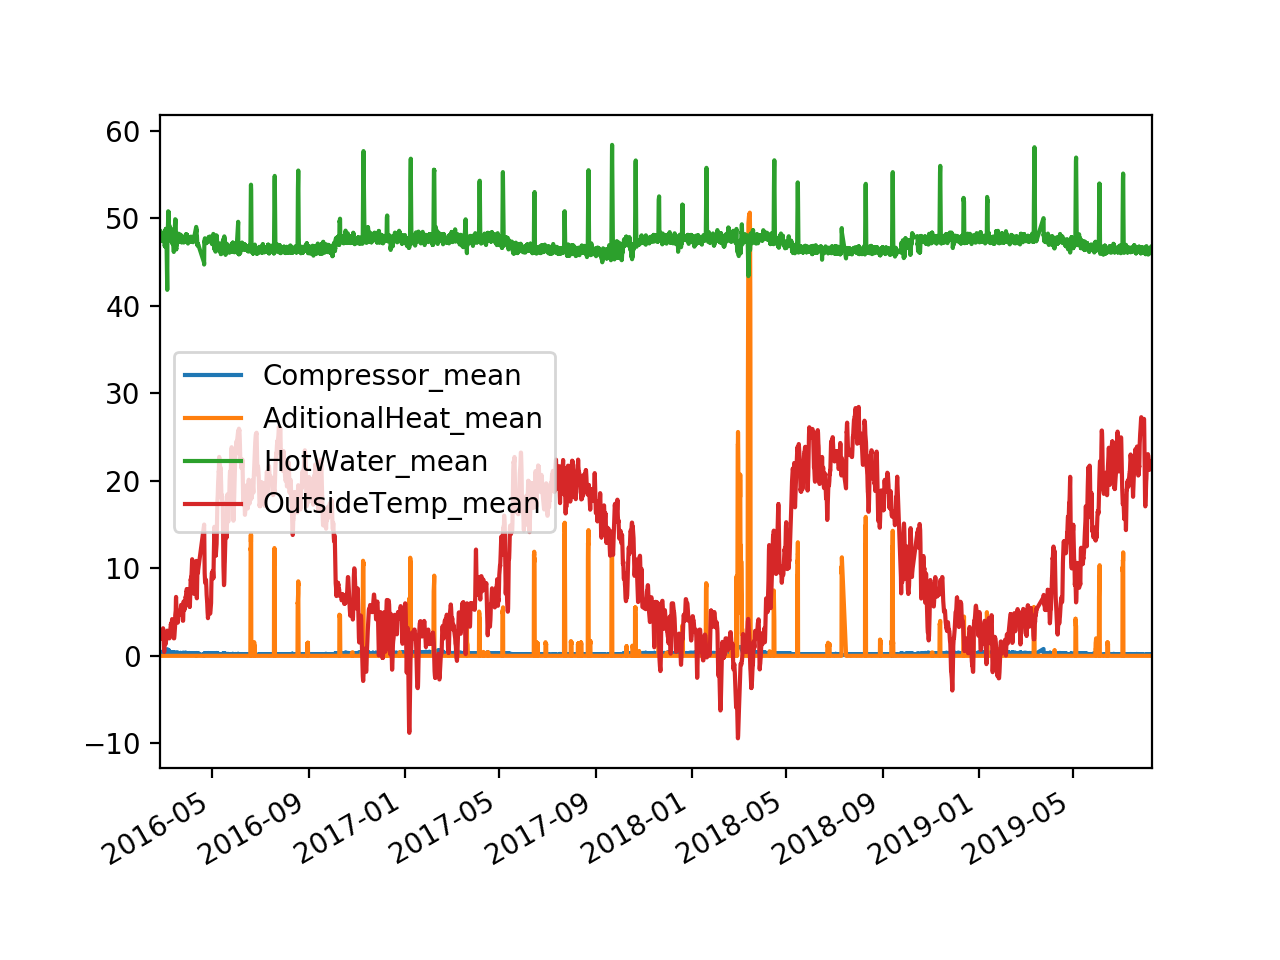

In [8]:
df.plot()


df columns: Index(['Compressor_mean', 'AditionalHeat_mean', 'HotWater_mean',
       'OutsideTemp_mean'],
      dtype='object')


<IPython.core.display.Javascript object>


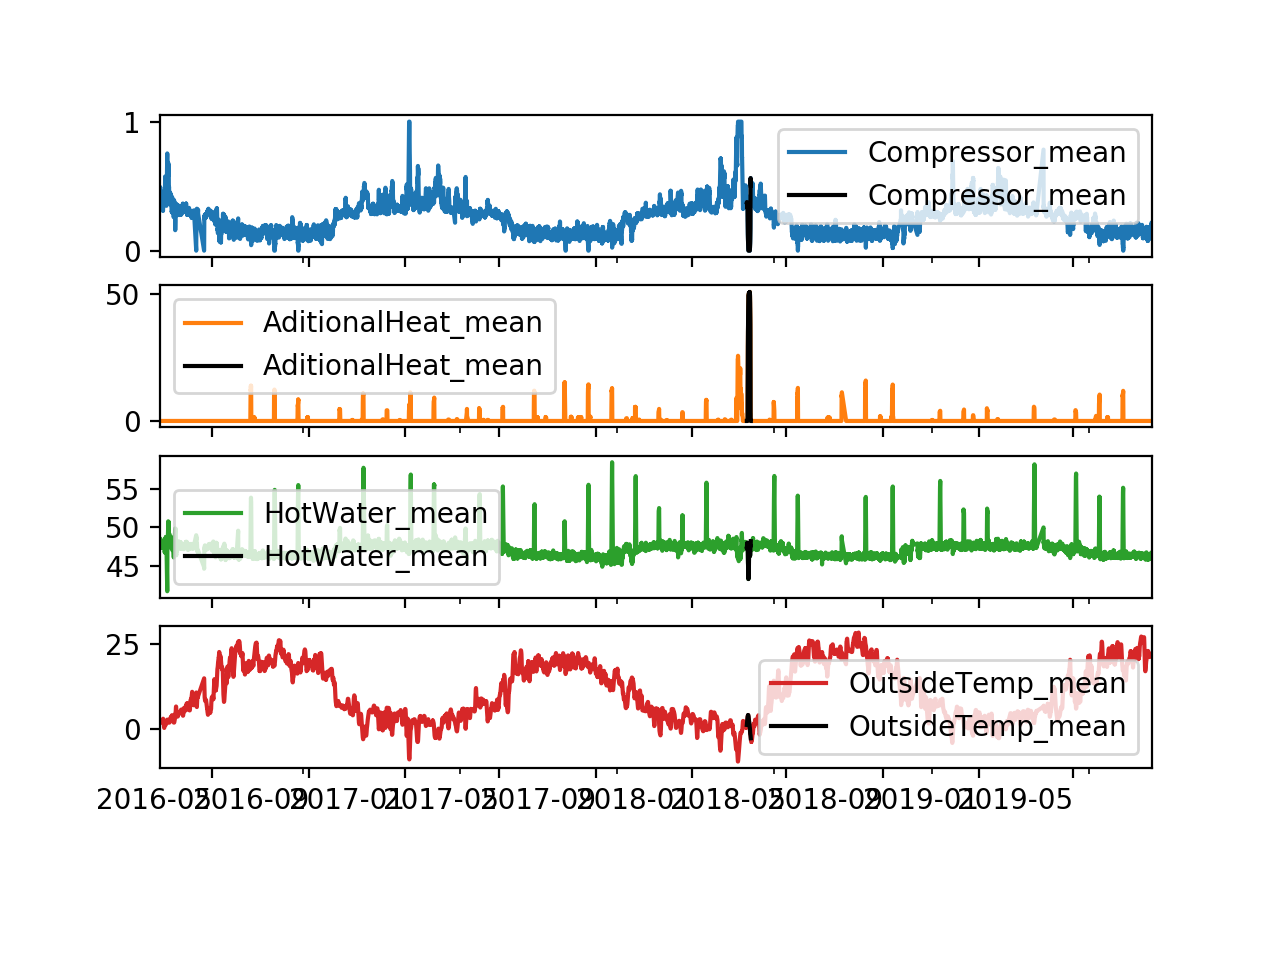

In [11]:
################### Some plotting (time series)
print("df columns:", df.columns)
ax = df.plot(subplots=True) # Plot the data (with all features) over time
ax = df[t1 : t2].plot(subplots=True, color="black", ax=ax) # plot in black the period where the failure happened
plt.show()

<IPython.core.display.Javascript object>


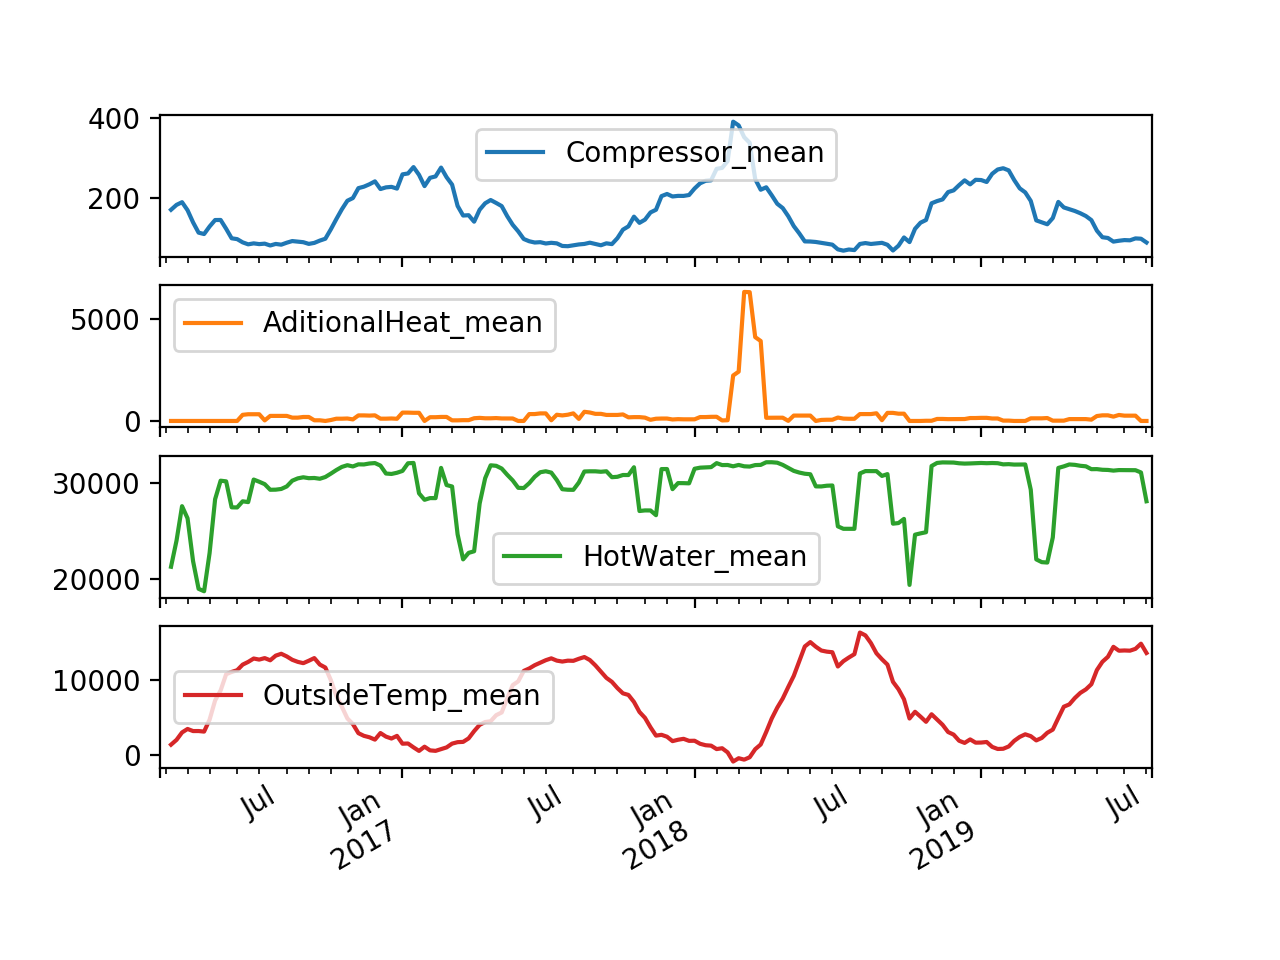

In [23]:

weekly = df.resample('W').sum()
weekly = weekly.rolling(4, center=True).sum()
ax = weekly.plot(subplots=True)
#ax = weekly.plot(subplots=True, color="black", ax=ax) 
plt.show()


In [24]:
weekly

,Compressor_mean,AditionalHeat_mean,HotWater_mean,OutsideTemp_mean
2016-02-28,NaN,NaN,NaN,NaN
2016-03-06,NaN,NaN,NaN,NaN
2016-03-13,171.147762,0.000000e+00,21275.242129,1370.656917
2016-03-20,183.365026,0.000000e+00,24017.188838,2016.039101
2016-03-27,190.056750,0.000000e+00,27624.509651,3012.426670
2016-04-03,170.015692,0.000000e+00,26349.834051,3477.230460
2016-04-10,139.674794,0.000000e+00,21861.358731,3196.793620
2016-04-17,114.040587,0.000000e+00,18964.572407,3199.396967
2016-04-24,110.535959,0.000000e+00,18707.244606,3124.012072
2016-05-01,129.434286,0.000000e+00,22716.516154,4727.940663


In [6]:
################### Preparing the data matrix X and corresponding labels y
# Adding a column "labels" withs values -1 (normal) or +1 (abnormal/failure)
df.loc[:, "labels"] = -1
df.loc[t1 : t2, "labels"] = 1

X = df.values[:, :-2]  # We ignore the two last columns (corresponding to "OutsideTemp_mean" and "labels")
y = df["labels"].values

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (28371, 3)
y shape: (28371,)


<IPython.core.display.Javascript object>


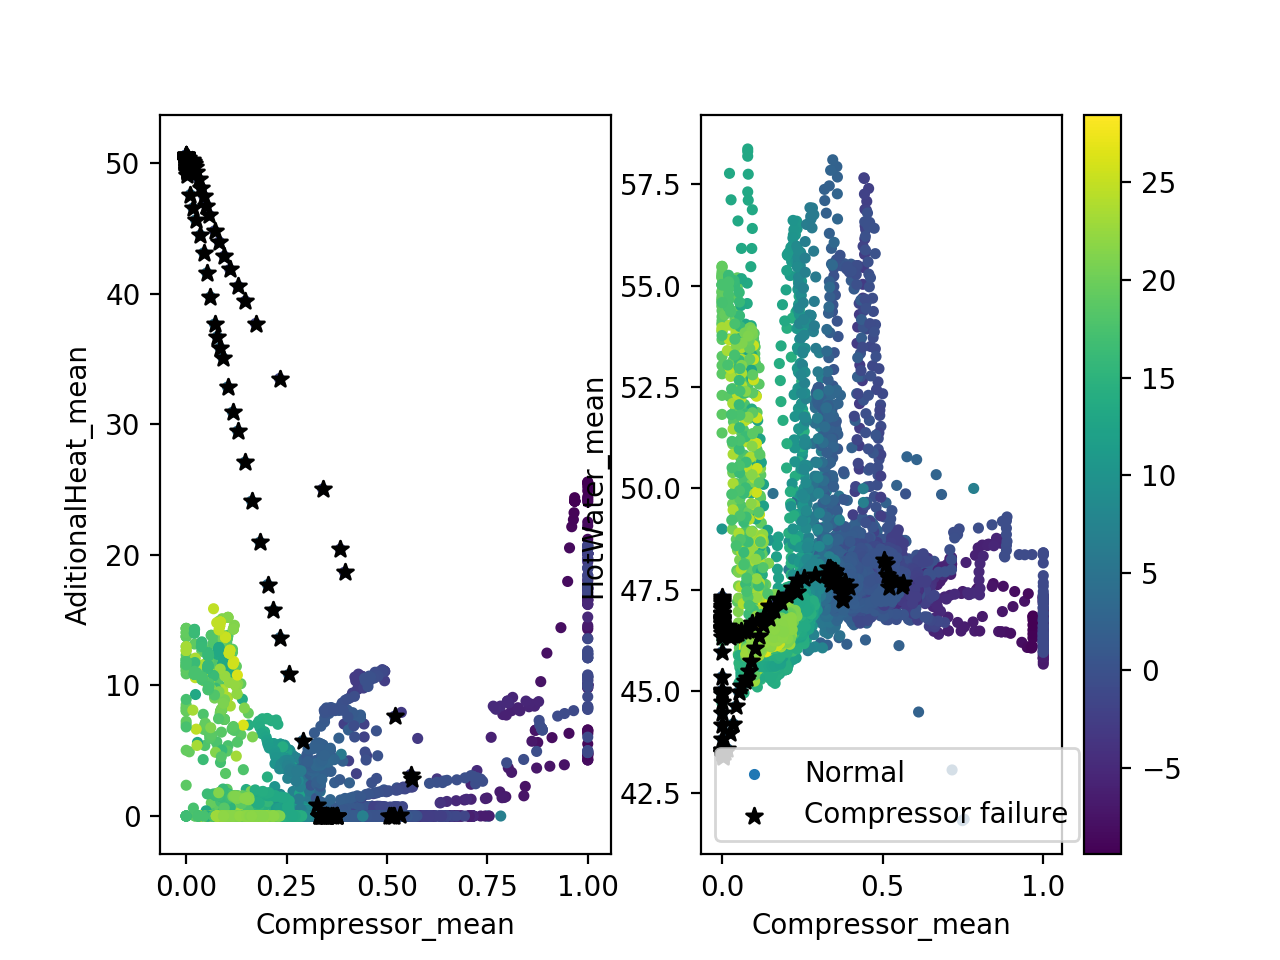

In [7]:
################### More plotting (scatter plots ...)
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.set_xlabel("Compressor_mean")
ax1.set_ylabel("AditionalHeat_mean")

ax2.set_xlabel("Compressor_mean")
ax2.set_ylabel("HotWater_mean")

colors = df["OutsideTemp_mean"].values # Using the outside temperature as colors (to show some context)

cax = ax1.scatter(X[:, 0], X[:, 1], marker=".", c=colors, label="Normal")
cax = ax2.scatter(X[:, 0], X[:, 2], marker=".", c=colors, label="Normal")

X1 = X[y == 1]  # subset of anomalous data (where label is +1)
# Re-plotting anomalies with a different marker (*) and color (black)
ax1.scatter(X1[:, 0], X1[:, 1], marker="*", color="black", label="Compressor failure")
ax2.scatter(X1[:, 0], X1[:, 2], marker="*", color="black", label="Compressor failure")

plt.colorbar(cax)
plt.legend()
plt.show()

In [8]:
Z = IsoForest(n_trees=20).fit(X).transform(X)

In [9]:
Z

array([[0.35031956, 0.31456728, 0.30758037, ..., 0.41687897, 0.45162045,
        0.30685312],
       [0.35031956, 0.31456728, 0.30758037, ..., 0.41687897, 0.45162045,
        0.30685312],
       [0.35031956, 0.31456728, 0.30758037, ..., 0.53635471, 0.45162045,
        0.30685312],
       ...,
       [0.46566494, 0.43573596, 0.30758037, ..., 0.34550346, 0.30452856,
        0.30685312],
       [0.46566494, 0.43573596, 0.30758037, ..., 0.34550346, 0.30452856,
        0.30685312],
       [0.33573255, 0.43573596, 0.30758037, ..., 0.34550346, 0.30452856,
        0.30685312]])

In [11]:
from sklearn.svm import OneClassSVM

In [12]:
clf = OneClassSVM(gamma='auto').fit(X)

In [14]:
p = clf.predict(X)
p

array([1, 1, 1, ..., 1, 1, 1])

In [13]:
My_pred=np.full((X.shape[0], 1), -1)
anomaly_ind=np.argsort(Z,axis=0)[-(int (0.1*X.shape[0])):]
My_pred[anomaly_ind]=1

In [ ]:
pseudoy = np.ravel(My_pred ,order='C')

In [ ]:
clf = RandomForestClassifier(n_estimators=50, random_state=1)

In [8]:
model = PAD(Z, X, plot=True)       # Instanciating a model
feedback_loop(model, y, budget=70)

TypeError: Expected sequence or array-like, got <class 'NoneType'>

In [ ]:
eva = Evaluation(y, expname="myExperiment")

for _ in range(5):
    
    Z1 = IsoForest(n_trees=1).fit(X).transform(X)
    My_pred=np.full((X.shape[0], 1), -1)
    anomaly_ind=np.argsort(Z1,axis=0)[-(int (0.1*X.shape[0])):]
    My_pred[anomaly_ind]=1
    pseudoy = np.ravel(My_pred ,order='C')
    
    clf = RandomForestClassifier(n_estimators=50, random_state=1)
    scores = clf.fit(X, pseudoy ).predict_proba(X)[:, 1]
    Zp = np.asmatrix(scores)
    Zp = np.transpose(Zp)
    
    isolation_forest = IsolationForest(n_estimators=100,contamination='auto',behaviour='deprecated').fit(X)
    anomaly_score = -(isolation_forest.score_samples(X))
    dim=X.shape
    Z_cluster=np.array([], dtype=np.int64).reshape(dim[0],0)
    for cluster in range(2,11):
        kmeans = KMeans(n_clusters=cluster).fit(X).labels_
        z=np.zeros((dim[0], cluster))
        for instance in range(dim[0]):
            col=kmeans[instance]
            z[instance,col]=anomaly_score[instance]
        Z_cluster=np.hstack([Z_cluster,z])
    Z = IsoForest().fit(X).transform(X)
    
    #eva.run([PAD(Z,pseudoy,X)])
    eva.run([Unsupervised(Z, X), OJRank(Z, X), OMD(Z, X),Unsupervised(Z_cluster, X), OJRank(Z_cluster, X), OMD(Z_cluster, X), PAD(Zp,pseudoy,X) ])
    #eva.run([Unsupervised(Z, X), Unsupervised(Z_cluster, X)])



In [ ]:
eva.plot_results("myExperiment.json", "precision")
eva.plot_results("myExperiment.json", "effort")